In [1]:
!pip install torch
!pip install huggingface_hub 
!pip install diffusers
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.7 MB/s eta 0:00:00


In [2]:
import torch
from huggingface_hub.repocard import RepoCard
from diffusers import DiffusionPipeline


model_id = "aakashrajaraman/output"
card = RepoCard.load(model_id)
base_model_id = card.data.to_dict()["base_model"]

pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16, use_safetensors=True, variant = "fp16").to("cuda")
pipe.unet.load_attn_procs(model_id, weight_name="pytorch_custom_diffusion_weights.bin")
pipe.load_textual_inversion(model_id, weight_name="<new1>.bin")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 49409. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc


In [3]:


prompt ="<new1> photo of an urban indian road in the city with buildings and people fron the point of view of a car . photo captured, hyper realistic, in focus, depth of field "



images = pipe(prompt=prompt,negative_prompt='bluriness,smooth images, merging objects',num_inference_steps = 100).images[0]

  0%|          | 0/100 [00:00<?, ?it/s]

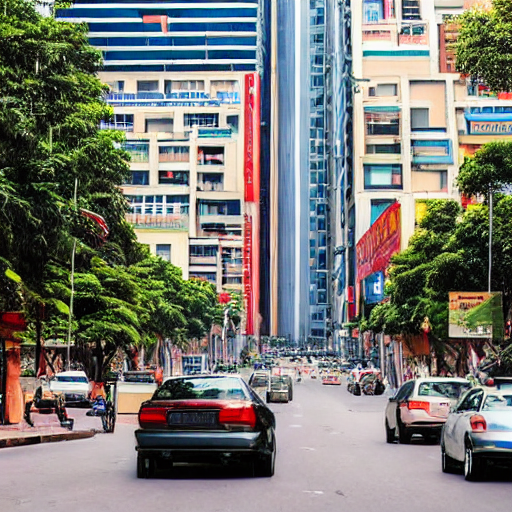

In [4]:
images

In [5]:
images.save("/kaggle/working/img1.png")

In [6]:
#np.save("/kaggle/working/numpy_array.npy",numpy_array)